In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

In [3]:
# importing the data 

df = pd.read_csv('C:\\Users\\DELL X360 i7\\OneDrive\\Desktop\\Heart Disease\\heart+disease\\processed.cleveland.data', header = None)
#df = pd.read_csv('https://archive.ics.uci.edu/dataset/45/heart+disease/processed.cleveland.data', header = None)

In [4]:
# Understanding the data
# printing first five rows of the data set
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# change the column numbers to column names 

df.columns = ['age','sex',
              'cp','restbp',
              'chol','fbs',
              'restecg','thalach',
              'exang','oldpeak',
              'slope','ca',
              'thal','hd']

df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# identifying and dealing with the missing data
    
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [7]:
#  ca and thal with object dtypes, may have some missing or question mark data
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [8]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [9]:
# Dealing with the missing data
# loc specifies the row location in the column where the missing data is
# len number of rows = 6

len(df.loc[(df['ca'] == '?')|(df['thal'] == '?')])

6

In [10]:
df.loc[(df['ca'] == '?')|(df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [11]:
# Removing rows with missing data since it is a small percentage

df_no_missing = df.loc[(df['ca'] != '?')
                       & (df['thal'] != '?')]

len(df_no_missing)

297

In [12]:
# Verifying that there are no missing values 

df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [13]:
df_no_missing['thal'].unique()

# No missing data has been verified 

array(['6.0', '3.0', '7.0'], dtype=object)

In [14]:
# Split the  data into dependent and independent variables 
# drop hd column and make a new copy

X = df_no_missing.drop('hd', axis = 1).copy()
# df_no_missing.iloc[:,:-1]
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [15]:
# Make a copy of dependent variables  
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [16]:
# Encoding categorical data so that model is not confused 

X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [17]:
pd.get_dummies(X, columns = ['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [18]:
# Encoding all variables with categorical data

X_encoded = pd.get_dummies(X, columns = ['cp',
                                         'restecg',
                                         'slope',
                                         'thal'])

X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [19]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [20]:
y_not_zero_index = y > 0 # get the index for each non-zero value in y
y[y_not_zero_index] = 1 # set each non-zero value in y to 1
y.unique()

array([0, 1], dtype=int64)

In [22]:
# Building the preliminary classification tree 
# split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42) 

# Create a decision tree and fit it to the training data 
clf_dt = DecisionTreeClassifier(random_state = 42) 
# if criteria is not defined, Gini impurity is chosen as default)
# apply more parameters to the function
clf_dt =  clf_dt.fit(X_train, y_train)

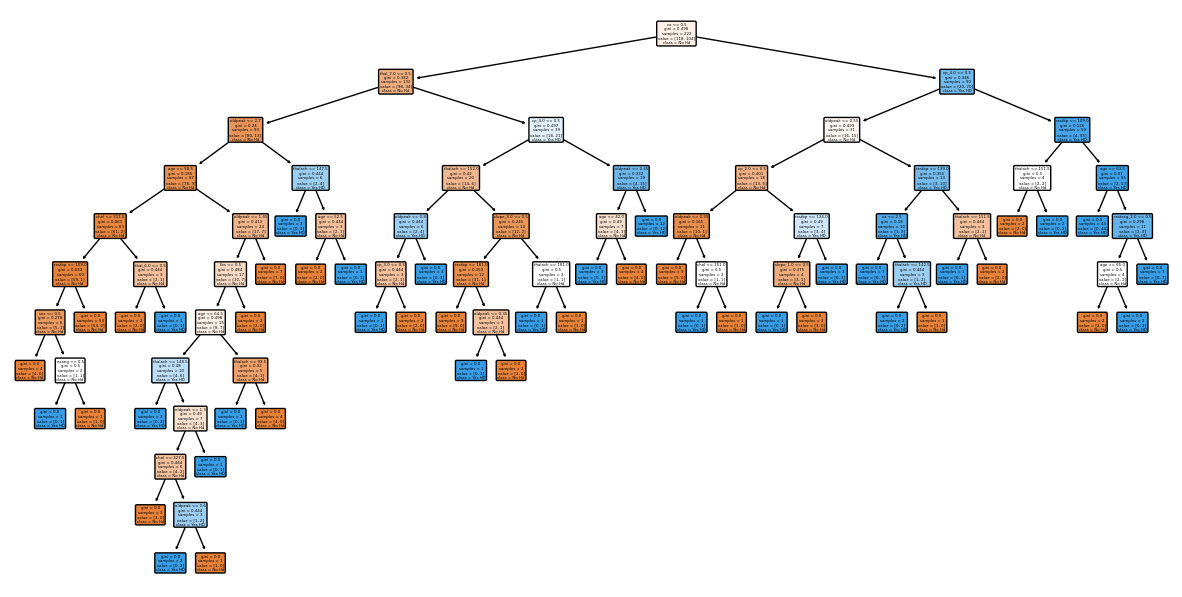

In [23]:
plt.figure(figsize = (15, 7.5))
plot_tree(clf_dt, filled = True, rounded = True, class_names = ['No Hd', 'Yes HD'],
          feature_names = X_encoded.columns);

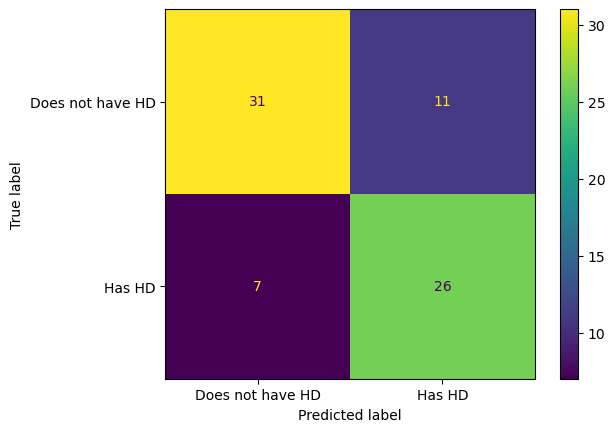

In [24]:
# Testing the dataset
# plot_confusion matrix will run the test data down the tree and draw a confusion matrix 

ConfusionMatrixDisplay.from_estimator(clf_dt,
                                      X_test,
                                      y_test,
                                      display_labels = ['Does not have HD', 'Has HD'])

In [26]:
# preventing over fitting 

path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine the values of alphas
ccp_alphas = path.ccp_alphas  # extract different values for alphas 
ccp_alphas = ccp_alphas[:-1]
clf_dts = [] # create an array that we will put the decision trees into 

#3 now create one decision tree per value for alphas and store it in the array 
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

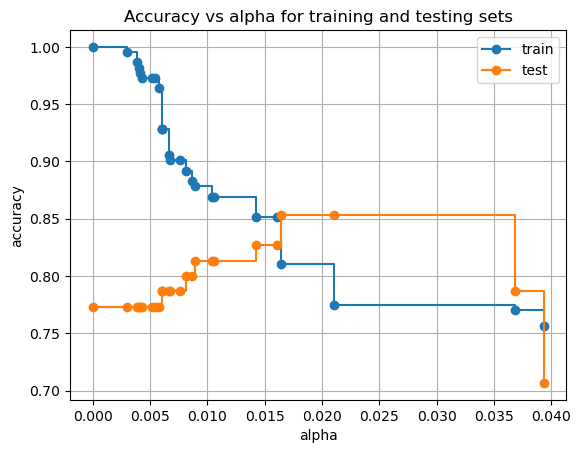

In [31]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots() 
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
ax.grid()
plt.show()

# The optimum alpha is about 0.016 for best accuracy for both train and test data 

<AxesSubplot:xlabel='tree'>

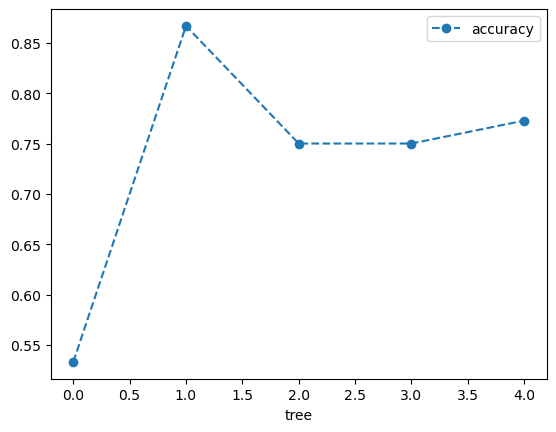

In [32]:
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.016) # create the tree with ccp-alpha 0.016

scores = cross_val_score(clf_dt, X_train, y_train, cv = 5)
df = pd.DataFrame( data ={'tree': range(5), 'accuracy': scores})

df.plot(x ='tree', y = 'accuracy', marker = 'o', linestyle = '--')

<AxesSubplot:xlabel='alpha'>

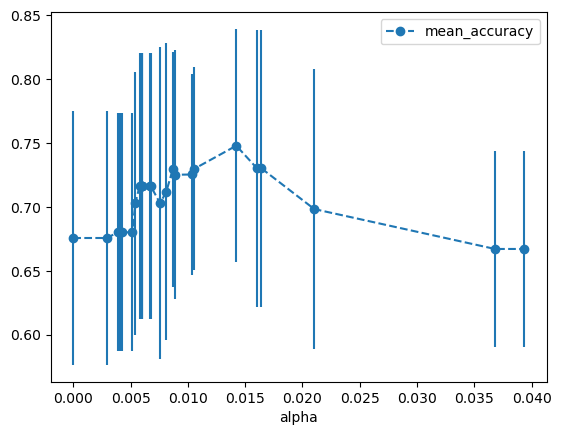

In [33]:
# create an array to store the results of each fold during cross validation 
alpha_loop_values = []

# for each alpha candidate we will run 5-fold cross validation
# Then we will store the mean and standard deviation of the scores (the accuracy) for each call 
# to cross_val_score in alpha_loop_values 

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state= 0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv = 5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    

#3 Now we can draw a graph of the means and standard deviations of the scores 
# for each candidate value for alpha 

alpha_results = pd.DataFrame(alpha_loop_values, columns= ['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x = 'alpha', y = 'mean_accuracy', yerr ='std', marker ='o', linestyle='--')

In [37]:
# extracting the best ccp alpha 

alpha_results[(alpha_results['alpha'] > 0.014) 
              & (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [40]:
# storing best alpha value 
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014) 
                                & (alpha_results['alpha'] < 0.015)]['alpha']

ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [41]:
# convert ideal alpha to a float 

ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha


0.014224751066856332

In [42]:
# building the final decision tree 
clf_dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

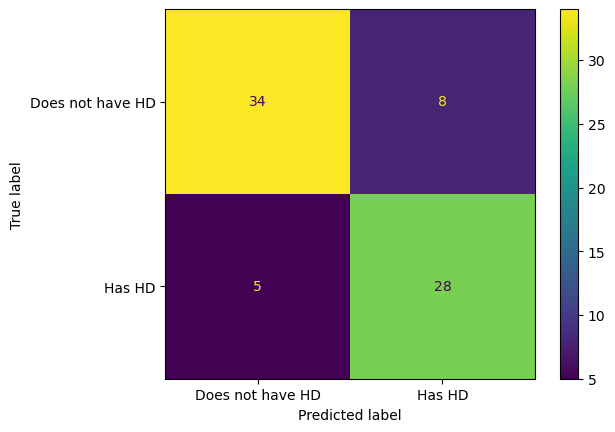

In [43]:
# Drawing the final decision tree 

ConfusionMatrixDisplay.from_estimator(clf_dt_pruned,
                                      X_test, 
                                      y_test, 
                                      display_labels=('Does not have HD', 'Has HD'))

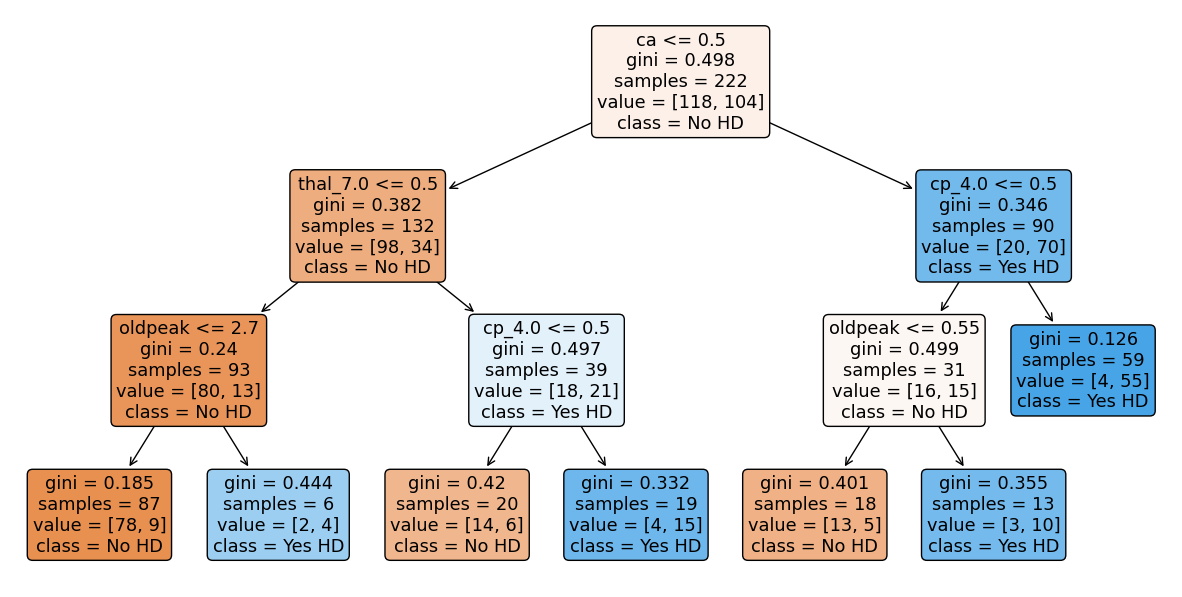

In [ ]:
plt.figure(figsize= [15, 7.5])
plot_tree(clf_dt_pruned, filled= True, rounded= True,
          class_names= ['No HD', 'Yes HD'],
          feature_names=(X_encoded.columns));